In [ ]:
# https://plotly.com/python/lines-on-maps/#us-flight-paths-map


In [5]:
Country_data = "/home/dipp/Github/Master-Thesis-dipp/Geo_map_V3_Latest/Data/Country_Data_V2_Latest.csv"
data = "/home/dipp/Github/Master-Thesis-dipp/Geo_map_V3_Latest/Data/Different_Country.csv"

In [11]:
import plotly.graph_objects as go
import importlib

importlib.reload(go)

fig = go.Figure(data=go.Scattergeo(
    lat = [40.7127, 51.5072],
    lon = [-74.0059, 0.1275],
    mode = 'lines',
    line = dict(width = 2, color = 'blue'),
))

fig.update_layout(
    title_text = 'London to NYC Great Circle',
    showlegend = False,
    geo = dict(
        resolution = 50,
        showland = True,
        showlakes = True,
        landcolor = 'rgb(204, 204, 204)',
        countrycolor = 'rgb(204, 204, 204)',
        lakecolor = 'rgb(255, 255, 255)',
        projection_type = "equirectangular",
        coastlinewidth = 2,
        lataxis = dict(
            range = [20, 60],
            showgrid = True,
            dtick = 10
        ),
        lonaxis = dict(
            range = [-100, 20],
            showgrid = True,
            dtick = 20
        ),
    )
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [13]:
import folium

# Latitude and Longitude coordinates for US (e.g., New York City)
us_coordinates = (40.7128, -74.0060)

# Latitude and Longitude coordinates for Germany (e.g., Berlin)
germany_coordinates = (52.5200, 13.4050)

# Create a map centered around the US
world_map = folium.Map(location=us_coordinates, zoom_start=3)

# Add markers for US and Germany
folium.Marker(location=us_coordinates, popup='United States').add_to(world_map)
folium.Marker(location=germany_coordinates, popup='Germany').add_to(world_map)

# Create a PolyLine to draw an arrow from US to Germany
arrow_line = folium.PolyLine(
    locations=[us_coordinates, germany_coordinates],
    color='blue',
    weight=2.5,
    opacity=1,
    icon=folium.DivIcon(html='<div style="font-size: 24pt; color: blue; text-shadow: 2px 2px white;">&rarr;</div>')
)

arrow_line.add_to(world_map)

# Save the map to an HTML file (optional)
world_map.save('world_map_with_arrow.html')

# Display the map
world_map



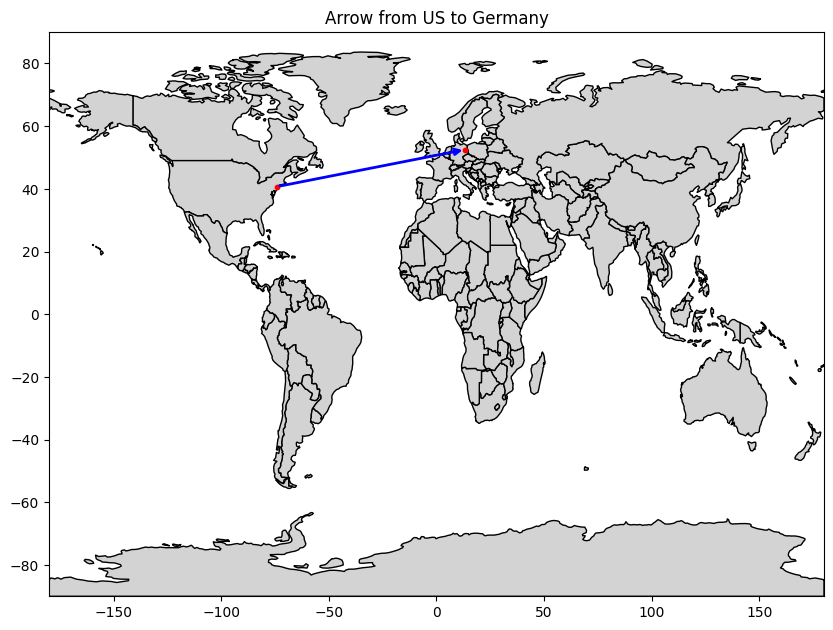

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with two points: US and Germany
us_point = Point(-74.0060, 40.7128)
germany_point = Point(13.4050, 52.5200)

data = {'Name': ['United States', 'Germany'],
        'geometry': [us_point, germany_point]}

gdf = gpd.GeoDataFrame(data, crs='EPSG:4326')

# Create a simple world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(10, 10), color='lightgray', edgecolor='k')

# Plot the points
gdf.plot(ax=ax, marker='o', color='red', markersize=10)

# Add arrows
arrowprops = dict(arrowstyle='-|>', color='blue', lw=2)
plt.annotate('', xy=gdf.geometry.iloc[1].coords[0], xytext=gdf.geometry.iloc[0].coords[0],
             arrowprops=arrowprops, annotation_clip=False)

# Set plot limits
ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])

# Show the map
plt.title('Arrow from US to Germany')
plt.show()



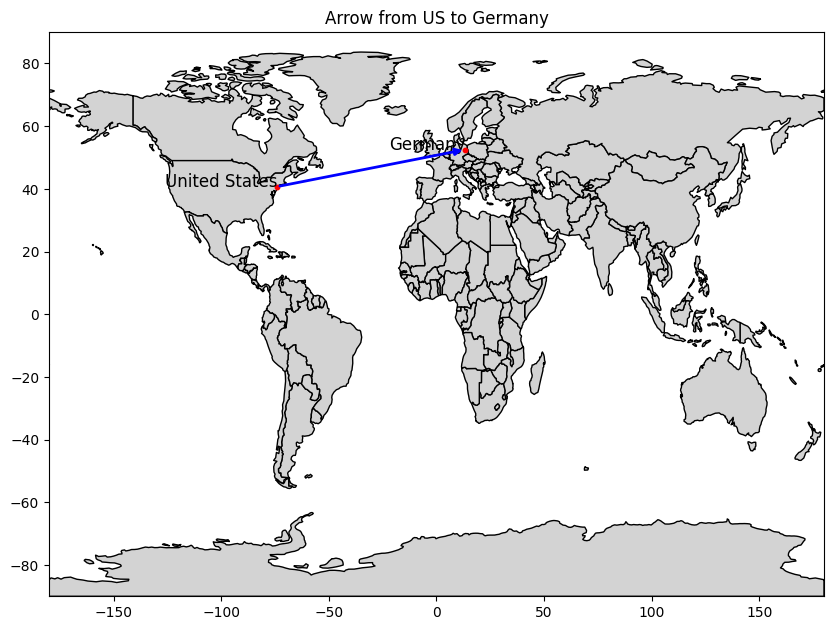

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with two points: US and Germany
us_point = Point(-74.0060, 40.7128)
germany_point = Point(13.4050, 52.5200)

data = {'Name': ['United States', 'Germany'],
        'geometry': [us_point, germany_point]}

gdf = gpd.GeoDataFrame(data, crs='EPSG:4326')

# Create a simple world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(10, 10), color='lightgray', edgecolor='k')

# Plot the points
gdf.plot(ax=ax, marker='o', color='red', markersize=10)

# Add country names
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Name']):
    ax.text(x, y, label, fontsize=12, ha='right')

# Add arrows
arrowprops = dict(arrowstyle='-|>', color='blue', lw=2)
plt.annotate('', xy=gdf.geometry.iloc[1].coords[0], xytext=gdf.geometry.iloc[0].coords[0],
             arrowprops=arrowprops, annotation_clip=False)

# Set plot limits
ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])

# Show the map
plt.title('Arrow from US to Germany')
plt.show()


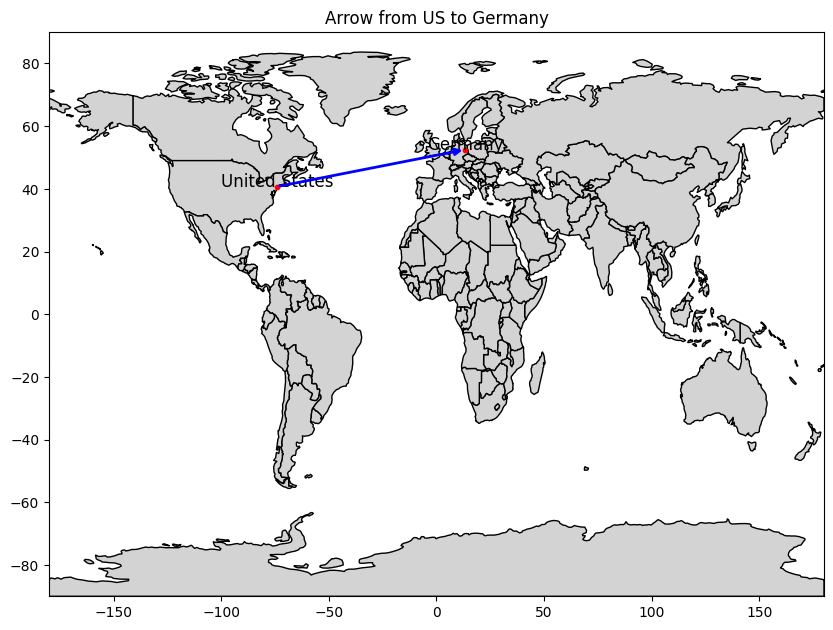

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with two points: US and Germany
us_point = Point(-74.0060, 40.7128)
germany_point = Point(13.4050, 52.5200)

data = {'Name': ['United States', 'Germany'],
        'geometry': [us_point, germany_point]}

gdf = gpd.GeoDataFrame(data, crs='EPSG:4326')

# Create a simple world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(10, 10), color='lightgray', edgecolor='k')

# Plot the points
gdf.plot(ax=ax, marker='o', color='red', markersize=10)

# Add country names
for idx, row in gdf.iterrows():
    ax.text(row.geometry.x, row.geometry.y, row['Name'], ha='center', fontsize=12)

# Add arrows
arrowprops = dict(arrowstyle='-|>', color='blue', lw=2)
plt.annotate('', xy=gdf.geometry.iloc[1].coords[0], xytext=gdf.geometry.iloc[0].coords[0],
             arrowprops=arrowprops, annotation_clip=False)

# Set plot limits
ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])

# Show the map
plt.title('Arrow from US to Germany')
plt.show()


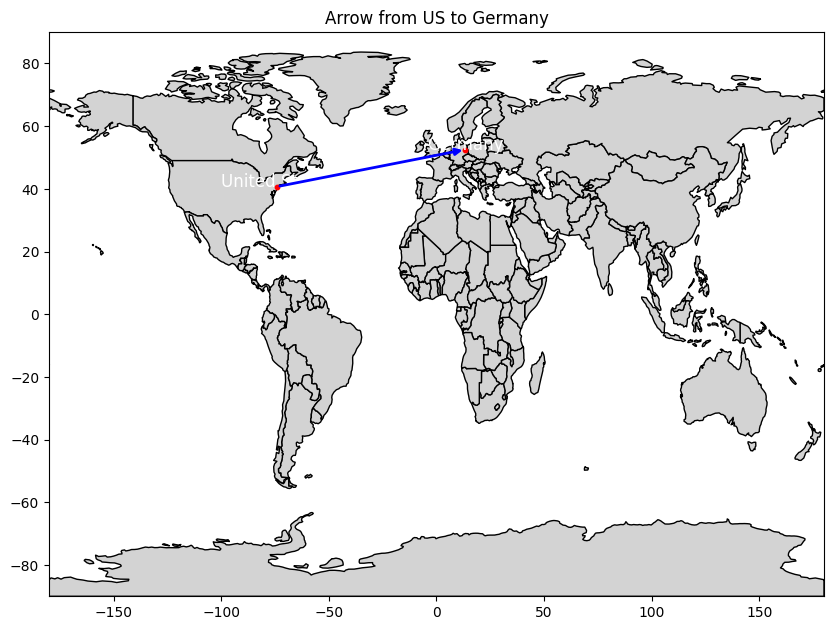

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with two points: US and Germany
us_point = Point(-74.0060, 40.7128)
germany_point = Point(13.4050, 52.5200)

data = {'Name': ['United States', 'Germany'],
        'geometry': [us_point, germany_point]}

gdf = gpd.GeoDataFrame(data, crs='EPSG:4326')

# Create a simple world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(10, 10), color='lightgray', edgecolor='k')

# Plot the points
gdf.plot(ax=ax, marker='o', color='red', markersize=10)

# Add country names with white text
for idx, row in gdf.iterrows():
    ax.text(row.geometry.x, row.geometry.y, row['Name'], ha='center', fontsize=12, color='white')

# Add arrows
arrowprops = dict(arrowstyle='-|>', color='blue', lw=2)
plt.annotate('', xy=gdf.geometry.iloc[1].coords[0], xytext=gdf.geometry.iloc[0].coords[0],
             arrowprops=arrowprops, annotation_clip=False)

# Set plot limits
ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])

# Show the map
plt.title('Arrow from US to Germany')
plt.show()
